# Case study on Supervised Learning with Iris Dataset

### Problem Statement:
#### Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

#### Importing Dependancies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Reading the Data

### 1.1 Loading the Dataset into Python

In [2]:
df = pd.read_excel(r'iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### 1.2 Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [9]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

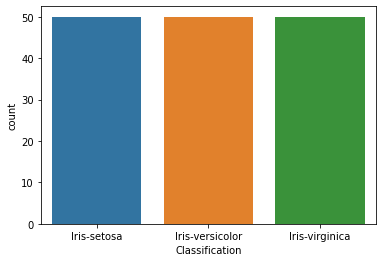

In [10]:
sns.countplot(x=df['Classification'])

In [11]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Pair Plot

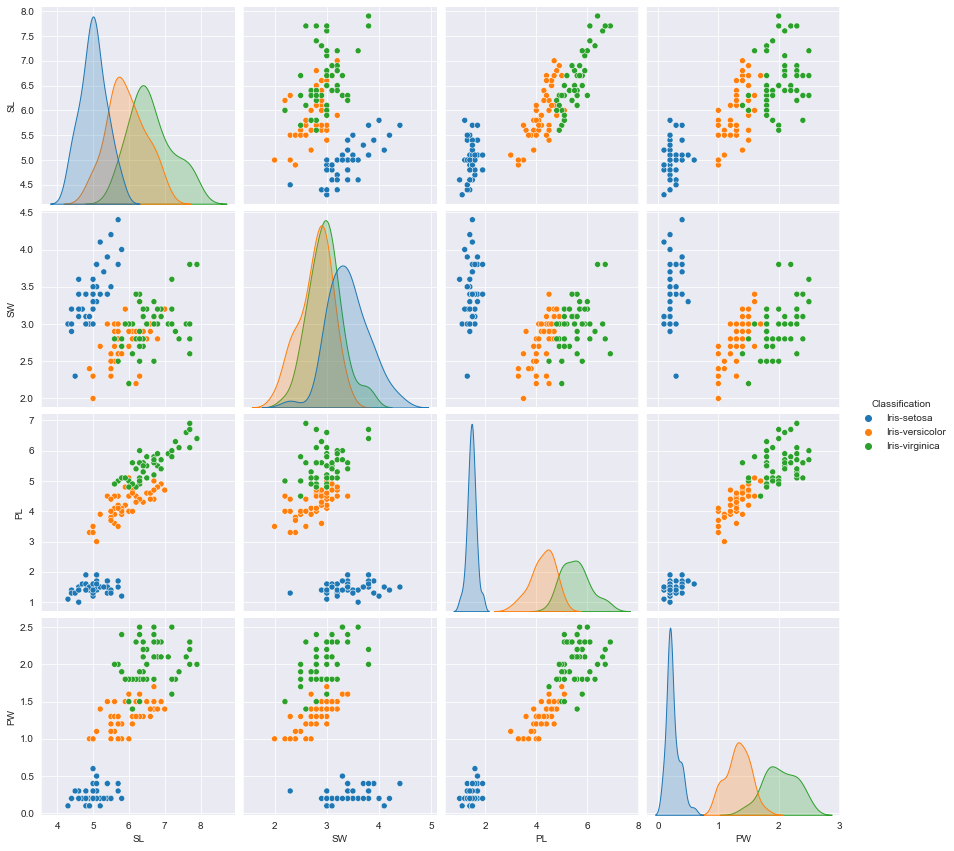

In [12]:
#pair plot 
sns.set_style("darkgrid");
sns.pairplot(df, hue="Classification", size=3);
plt.show()

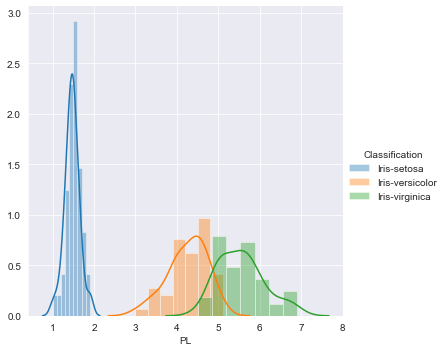

In [13]:
sns.FacetGrid(df, hue="Classification", size=5) \
   .map(sns.distplot, "PL") \
   .add_legend()
plt.show()

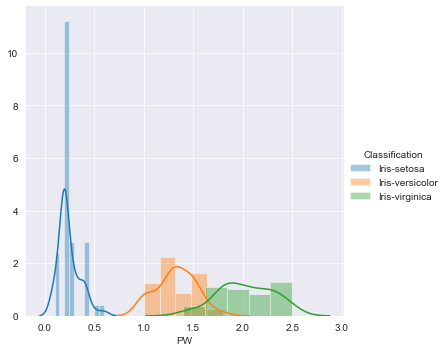

In [14]:
sns.FacetGrid(df, hue="Classification", size=5) \
   .map(sns.distplot, "PW") \
   .add_legend()
plt.show()

##### Box and Violin Plots

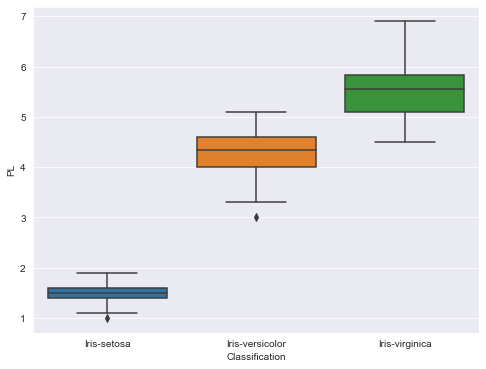

In [15]:
#Box Plot for Petal Length
plt.figure(figsize=(8,6))
sns.boxplot(x='Classification',y='PL', data=df)
plt.show()

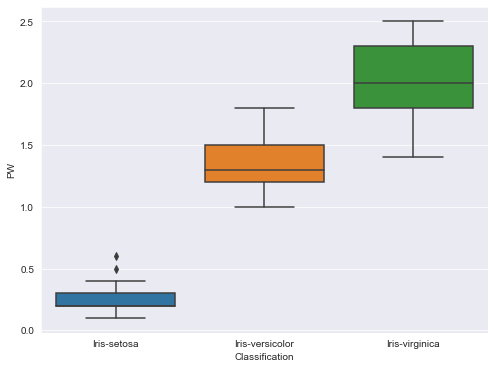

In [16]:
#Box Plot for Petal Width
plt.figure(figsize=(8,6))
sns.boxplot(x='Classification',y='PW', data=df)
plt.show()

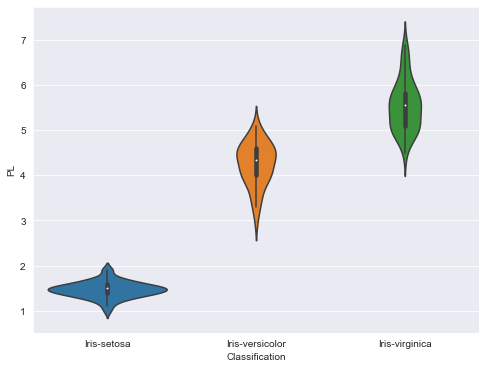

In [17]:
#Violin Plot for Petal Length
plt.figure(figsize=(8,6))
sns.violinplot(x='Classification',y='PL', data=df)
plt.show()

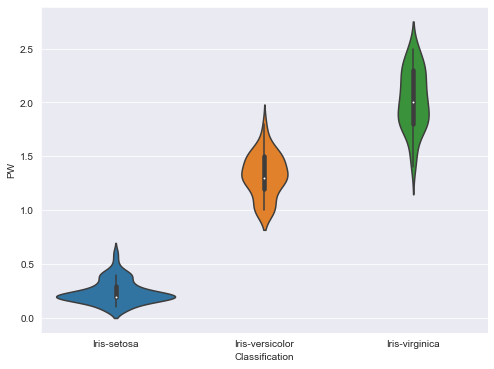

In [18]:
#Violin Plot for Petal Width
plt.figure(figsize=(8,6))
sns.violinplot(x='Classification',y='PW', data=df)
plt.show()

**Findings:**
1. Petal Length and Petal Width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### 2. Data Preprocessing

In [19]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


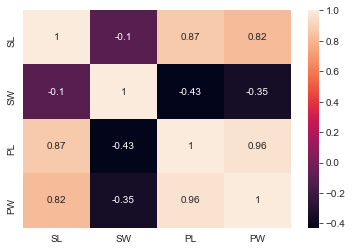

In [20]:
sns.heatmap(df.corr(),annot=True)

### 2.1 Filling Missing Values 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

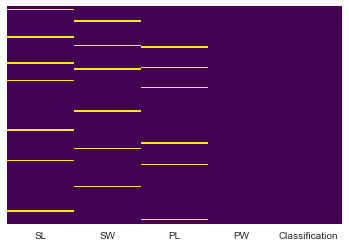

In [23]:
#heatmap for nulls
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

**A. Handling Missing values in SL (Sepal Length) column**

In [24]:
df[df['SL'].isnull()]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
85,NaN,3.4,4.5,1.6,Iris-versicolor
106,NaN,2.5,4.5,1.7,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica


In [25]:
df['SL'].mean()

5.8559440559440565

In [26]:
df['SL'].median()

5.8

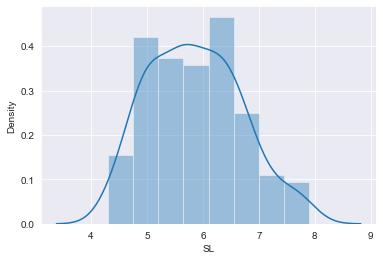

In [27]:
sns.distplot(df['SL'],kde=True)

* Sepal Length is somewhat normally distributed.
* However, to avoid the impact of outliers, we can impute the missing values using median in this case.
* Similar strategy will be used for other features like SW, PL, PW, etc.

In [28]:
df['SL'].fillna(df['SL'].median(),inplace=True)

In [29]:
df['SL'].isnull().sum()

0

**B. Handling Missing values in SW (Sepal Width) column**

In [30]:
df[df['SW'].isnull()]

,SL,SW,PL,PW,Classification
10,5.4,NaN,1.5,0.2,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
72,6.3,NaN,4.9,1.5,Iris-versicolor
98,5.1,NaN,3.0,1.1,Iris-versicolor
124,6.7,NaN,5.7,2.1,Iris-virginica


In [31]:
df['SW'].mean()

3.0493055555555566

In [32]:
df['SW'].median()

3.0

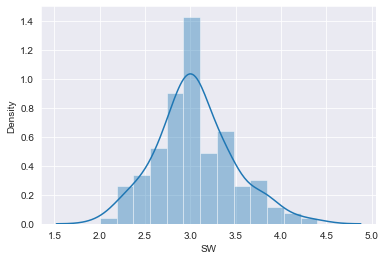

In [33]:
sns.distplot(df['SW'],kde=True)

In [34]:
df['SW'].fillna(df['SW'].median(),inplace=True)

In [35]:
df['SW'].isnull().sum()

0

**C. Handling Missing values in PL (Petal Length) column**

In [36]:
df[df['PL'].isnull()]

,SL,SW,PL,PW,Classification
28,5.2,3.4,NaN,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
56,6.3,3.3,NaN,1.6,Iris-versicolor
94,5.6,2.7,NaN,1.3,Iris-versicolor
109,7.2,3.6,NaN,2.5,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica


In [37]:
df['PL'].mean()

3.756250000000003

In [38]:
df['PL'].median()

4.35

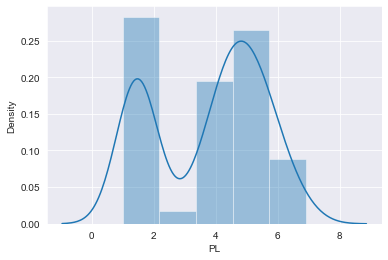

In [39]:
sns.distplot(df['PL'],kde=True)

In [40]:
df['PL'].fillna(df['PL'].median(),inplace=True)

In [41]:
df['PL'].isnull().sum()

0

In [42]:
#There are no Null Values in Petal Width column
df['PW'].isnull().sum()

0

In [43]:
#There are no Null Values in Target Label column
df['Classification'].isnull().sum()

0

### 2.2 Handling Outliers

* We have to check and handle outliers for PL, PW, SL and SW columns 
* In this case study, the outliers below and above the lower and upper limit respectively have been removed.
* However, since our dataset is smaller, it is a better practice to treat the outliers by reducing the value of the outliers to the nearest allowed limit. (Adjusting the outliers)

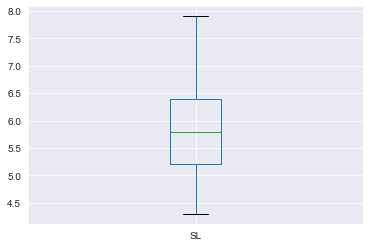

In [44]:
df.boxplot(column='SL')

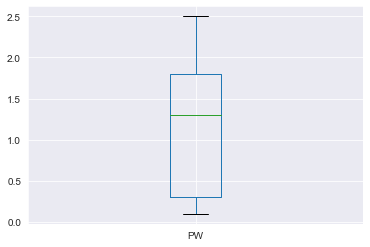

In [45]:
df.boxplot(column='PW')

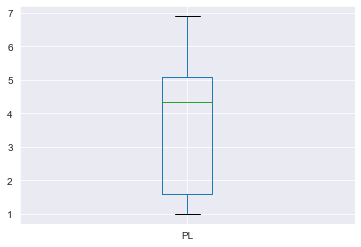

In [46]:
df.boxplot(column='PL')

* We don't see any outliers in Petal Length, Petal Width and Sepal Length columns.

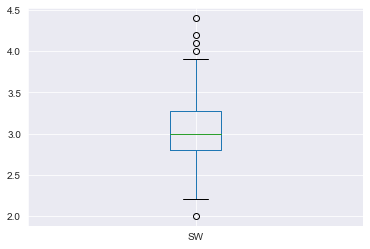

In [47]:
df.boxplot(column='SW')

* Sepal Width is showing outliers on both extremes

In [48]:
#np.percentile can also be used instead of quantiles 

Q1_SW = df['SW'].quantile(0.25)
Q3_SW = df['SW'].quantile(0.75)
IQR_SW = Q3_SW - Q1_SW
print("The Inter-Quartile Range for Sepal Width is",IQR_SW)

The Inter-Quartile Range for Sepal Width is 0.47499999999999964


In [49]:
low_lim_SW = Q1_SW - 1.5 * IQR_SW
upp_lim_SW = Q3_SW + 1.5 * IQR_SW
print("Lower limit for Sepal Width is", low_lim_SW)
print("Upper limit for Sepal Width is", upp_lim_SW)
print("Beyond upper and lower limits, the values are classified as Outliers.") 

Lower limit for Sepal Width is 2.0875000000000004
Upper limit for Sepal Width is 3.987499999999999
Beyond upper and lower limits, the values are classified as Outliers.


In [50]:
#detecting outliers from the column
outlier_SW = df[(df['SW'] < Q1_SW - 1.5*IQR_SW) | (df['SW'] > Q3_SW + 1.5*IQR_SW)]

In [51]:
outlier_SW

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [52]:
len(outlier_SW) #5 outliers 

5

In [53]:
outlier_SW.index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [54]:
df = df.drop([14, 15, 32, 33, 60])

In [55]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


* We dropped five outliers and shape has changed to 145 from 150.
* Instead of dropping the outliers, we could have also reset the value of the outliers to the nearest limit (upper or lower) and retained these records for our analysis.

### 2.3 Label Encoding

##### Note on Limitation of Label Encoding:

* Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues in the training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.
* In some cases, it is preferable to map the values to the labels using the python mapping. This can to some extent control the bias.

In [56]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
 
#encode labels in column 'Classification'.
df['Classification']= label_encoder.fit_transform(df['Classification'])
 
df['Classification'].unique()

array([0, 1, 2])

##### Legend for Encoding 
* 0 is Iris Setosa
* 1 is Iris Versicolour
* 2 is Iris Virginica

In [57]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.2 KB


### 3. Modelling

The problem at hand is a multi-class (3-class) classification problem. Hence we will be using classification algorithms like:
1. Logistic Regression
2. K-nearest Neighbours 
3. Support Vector Machines
4. Decision Tree
5. and Random Forest

#### Train Test Splitting

In [60]:
#divide the data into predictor variables (X) and target label (y)

X = df.iloc[:,:4]
y = df.iloc[:,4]

In [61]:
X.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
y.to_frame().head()

,Classification
0,0
1,0
2,0
3,0
4,0


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape

(116, 4)

In [65]:
y_train.shape

(116,)

In [66]:
X_test.shape

(29, 4)

In [67]:
y_test.shape

(29,)

#### Scaling using StandardScaler

* When the modelling was carried out after implementing Standard Scaling, below where the scores:
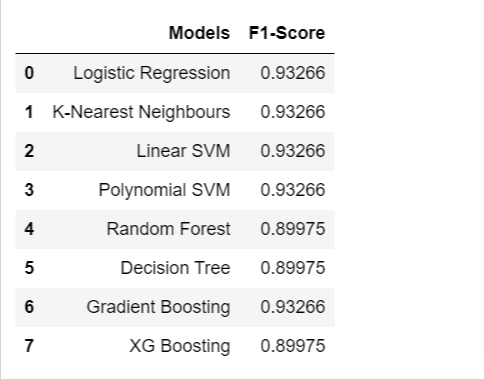


* However, in this notebook, modelling has been carried out without Scaling.

##### Baseline Prediction

In [68]:
#The baseline prediction for the model is 1/3
df['Classification'].value_counts(normalize= True)

2    0.344828
1    0.337931
0    0.317241
Name: Classification, dtype: float64

Baseline prediction is the probability of predicting class before the model is implemented. If the data is split into 3 classes evenly (as in the original Iris dataset, there are 50 records each for each of the three classes). Hence, there is already a 33% chance of randomly assigning an element to the correct class. 

#### 3.1 Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

#create the model instance
model = LogisticRegression()

In [70]:
#fit the model on the training data
model.fit(X_train, y_train)

#predictions
y_pred1 = model.predict(X_test)

In [71]:
#checking score, or accuracy of the model
model.score(X_test, y_test)

0.9310344827586207

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,y_pred1),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,y_pred1,average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,y_pred1,average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,y_pred1,average='macro'),4))

Accuracy for Logistic Regression is 0.931
Precision for Logistic Regression is 0.9327
Recall for Logistic Regression is 0.9327
F1-Score for Logistic Regression is 0.9327


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



In [132]:
#test score is already pretty high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9318181818181819


Without any adjustments or tuning, this model is already performing very well with a test score of .93 and a cross validation score of .932. This means that the model is predicting the correct class for the flower about 93 % of time. Much higher than the baseline of 33%!

Text(34.0, 0.5, 'Actual Labels')

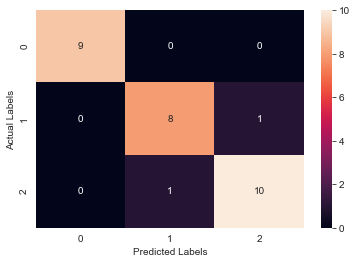

In [75]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [76]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred1,average='macro'),5)])

#### 3.2 K-Nearest Neighbours

In [77]:
#k-value = 3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
#checking score, or accuracy of the model
knn.score(X_test, y_test)

0.9310344827586207

In [79]:
y_pred2 = knn.predict(X_test)
print('The accuracy of the KNN model is',round(accuracy_score(y_pred2,y_test),4))

The accuracy of the KNN model is 0.931


In [80]:
#Trying different K-values
error_rate = []

for i in range(1,21):
    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred_i = kn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

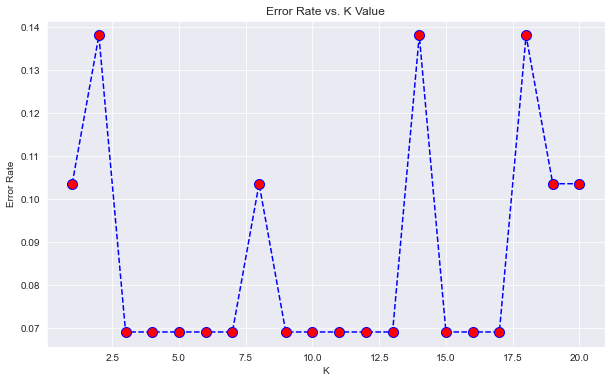

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

* We pick k =3 which is odd, less and gives the least error rate as well.

In [82]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for KNN is",round(accuracy_score(y_test,y_pred2),4))
print("Precision for KNN is",round(precision_score(y_test,y_pred2,average='macro'),4))
print("Recall for KNN is",round(recall_score(y_test,y_pred2,average='macro'),4))
print("F1-Score for KNN is",round(f1_score(y_test,y_pred2,average='macro'),4))

Accuracy for KNN is 0.931
Precision for KNN is 0.9327
Recall for KNN is 0.9327
F1-Score for KNN is 0.9327


In [83]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



Text(34.0, 0.5, 'Actual Labels')

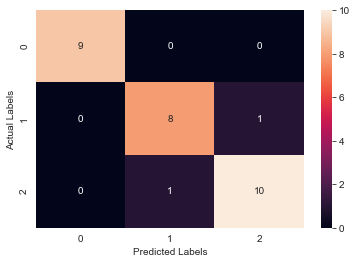

In [84]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [85]:
temp.append(['K-Nearest Neighbours',round(f1_score(y_test,y_pred2,average='macro'),5)])

#### 3.3 Support Vector Machines

##### A. Linear SVM

In [86]:
from sklearn.svm import SVC

#instantiating and fitting linear svm
lin_sv = SVC(kernel='linear')

lin_sv.fit(X_train,y_train)

SVC(kernel='linear')

In [87]:
y_pred3 = lin_sv.predict(X_test)

In [88]:
#checking score, or accuracy of the model
lin_sv.score(X_test, y_test)

0.896551724137931

In [89]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Linear SVM is",round(accuracy_score(y_test,y_pred3),4))
print("Precision for Linear SVM is",round(precision_score(y_test,y_pred3,average='macro'),4))
print("Recall for Linear SVM is",round(recall_score(y_test,y_pred3,average='macro'),4))
print("F1-Score for Linear SVM is",round(f1_score(y_test,y_pred3,average='macro'),4))

Accuracy for Linear SVM is 0.8966
Precision for Linear SVM is 0.9
Recall for Linear SVM is 0.9024
F1-Score for Linear SVM is 0.8997


In [90]:
temp.append(['Linear SVM',round(f1_score(y_test,y_pred3,average='macro'),5)])

In [91]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



##### B. Polynomial SVM

In [92]:
#instantiating and fitting poly svm
poly_sv = SVC(kernel='poly',degree=3)
poly_sv.fit(X_train,y_train)

SVC(kernel='poly')

In [93]:
y_pred4 = lin_sv.predict(X_test)

In [94]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Polynomial SVM is",round(accuracy_score(y_test,y_pred4),4))
print("Precision for Polynomial SVM is",round(precision_score(y_test,y_pred4,average='macro'),4))
print("Recall for Polynomial SVM is",round(recall_score(y_test,y_pred4,average='macro'),4))
print("F1-Score for Polynomial SVM is",round(f1_score(y_test,y_pred4,average='macro'),4))

Accuracy for Polynomial SVM is 0.8966
Precision for Polynomial SVM is 0.9
Recall for Polynomial SVM is 0.9024
F1-Score for Polynomial SVM is 0.8997


In [95]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [96]:
temp.append(['Polynomial SVM',round(f1_score(y_test,y_pred4,average='macro'),5)])

#### 3.4 Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [98]:
dt_pred = dt.predict(X_test) 

In [99]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Decision Tree is",round(accuracy_score(y_test,dt_pred),4))
print("Precision for Decision Tree is",round(precision_score(y_test,dt_pred,average='macro'),4))
print("Recall for Decision Tree is",round(recall_score(y_test,dt_pred,average='macro'),4))
print("F1-Score for Decision Tree is",round(f1_score(y_test,dt_pred,average='macro'),4))

Accuracy for Decision Tree is 0.8966
Precision for Decision Tree is 0.9
Recall for Decision Tree is 0.9024
F1-Score for Decision Tree is 0.8997


In [100]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [101]:
temp.append(['Decision Tree',round(f1_score(y_test,dt_pred,average='macro'),5)])

#### 3.5 Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
y_pred5 = rf.predict(X_test)

In [104]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Random Forest is",round(accuracy_score(y_test,y_pred5),4))
print("Precision for Random Forest is",round(precision_score(y_test,y_pred5,average='macro'),4))
print("Recall for Random Forest is",round(recall_score(y_test,y_pred5,average='macro'),4))
print("F1-Score for Random Forest is",round(f1_score(y_test,y_pred5,average='macro'),4))

Accuracy for Random Forest is 0.931
Precision for Random Forest is 0.9327
Recall for Random Forest is 0.9327
F1-Score for Random Forest is 0.9327


In [105]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



In [106]:
temp.append(['Random Forest',round(f1_score(y_test,y_pred5,average='macro'),5)])

**Hyperparameter Tuning using GridSearchCV for RF**

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
#hyperparameter tuning
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
#create a base model
rf2 = RandomForestClassifier()

#instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [126]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [130]:
#retraining the model with tuned parameters 
rf2 = RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 min_samples_leaf= 5,
 min_samples_split= 8,
 n_estimators= 100,random_state=42)
rf2.fit(X_train,y_train)
rf2pred = rf2.predict(X_test)

print("The Accuracy for RandomForest model is",accuracy_score(y_test,rf2pred))

The Accuracy for RandomForest model is 0.9310344827586207


In [121]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



In [122]:
accuracy_score(y_test,y_predrf)

0.9310344827586207

In [131]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(rf, X_train, y_train, cv=10)
print(np.mean(scores2))

0.975


* With cross validation, the score in Random Forest can be improved upto 97.5 % accuracy.

#### 3.5 Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

#instantiating and fitting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [108]:
y_pred6 = gb.predict(X_test)

In [109]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is",round(accuracy_score(y_test,y_pred6),4))
print("Precision is",round(precision_score(y_test,y_pred6,average='macro'),4))
print("Recall is",round(recall_score(y_test,y_pred6,average='macro'),4))
print("F1-Score is",round(f1_score(y_test,y_pred6,average='macro'),4))

Accuracy is 0.8966
Precision is 0.9
Recall is 0.9024
F1-Score is 0.8997


In [110]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [111]:
temp.append(['Gradient Boosting',round(f1_score(y_test,y_pred6,average='macro'),5)])

#### 3.6 Extreme Gradient Boosting

In [112]:
from xgboost import XGBClassifier

#instantiating and fitting
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[18:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [113]:
y_pred7 = xgb.predict(X_test)

In [114]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is",round(accuracy_score(y_test,y_pred7),4))
print("Precision is",round(precision_score(y_test,y_pred7,average='macro'),4))
print("Recall is",round(recall_score(y_test,y_pred7,average='macro'),4))
print("F1-Score is",round(f1_score(y_test,y_pred7,average='macro'),4))

Accuracy is 0.8966
Precision is 0.9
Recall is 0.9024
F1-Score is 0.8997


In [115]:
temp.append(['XG Boosting',round(f1_score(y_test,y_pred7,average='macro'),5)])

### 4. Performance Metric Comparison

In [116]:
performance_df = pd.DataFrame(temp, columns = ['Models', 'F1-Score'])

In [117]:
performance_df

,Models,F1-Score
0,Logistic Regression,0.93266
1,K-Nearest Neighbours,0.93266
2,Linear SVM,0.89975
3,Polynomial SVM,0.89975
4,Decision Tree,0.89975
5,Random Forest,0.93266
6,Gradient Boosting,0.89975
7,XG Boosting,0.89975


### 5. Conclusion:

1. Data Preprocessing
   * The Iris Dataset was loaded from the xls file using Pandas into the python environment. Petal and Sepal Lengths and Widths where taken as the relevant features for the analysis and model building.
   * Possible data cleaning and pre-processing was carried out to clean-up the data from Missing Values and Outliers.
   * Necessary pre-processing of data from object to numeric representation was done using Encoding.


2. Model Building
    * General approach taken was to fit the model to the training data and transform it. Models like Logistic Regression, K-Nearest Neighbours, Decision Tree, RandomForest and Boosting Algorithms like Gradient Boosting and XGBoost were used (most without and some with hyperparameter tuning).
    * For Logistic Regression and Random Forest, best scores were calculated using Cross Validation scores. 
    * From a high-level, brief model training and testing, it was found that Random Forest gives an F-score of 0.932 without tuning and with Cross Validation, it gives a score of 0.975. 
    * Other classification models like Logistic Regression and KNN also gives quite good scores on par with Random Forest. 
    * Models like Logistic Regression is computationally less expensive compared to Random Forest. Hence, as Logistic Regression gives almost similar results as Random Forest, it is advisable to use Logistic Regression.
    * The performane metrics listed in the above table as obtained for the models is not the best as all hyperparamters where not tried and tested and the entire model building process was just a basic to intermediate approach.

In [ ]:
#Submitted by Sujith Narayanan
#DSA_B3 - 2021 October Batch

<center> <h2> - END OF CASE STUDY - 